# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** 22

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 12.03.2021  
**Due date:** 26.03.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1: Brain segmentation

Your goal: compute the size of the brain (without the skull) in pixels in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI) using:
* Region growing (5 pts)
* Contour detection (5 pts)
* Additional method of your choice (5 pts)

Each section should display the resulting segmenttion as well as the size in pixel of the detected region. Comment each method limitations and/or advantages.

### 1.1 Brain image visualization

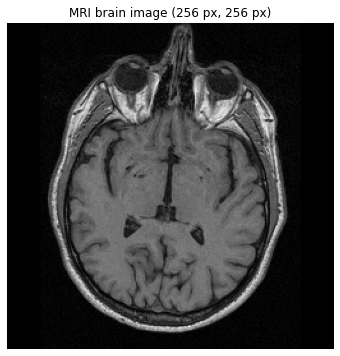

In [2]:
import skimage.io
import skimage.measure
import skimage.filters
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

# Display MRI image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing (5pts)

region : 
 (0, 2)


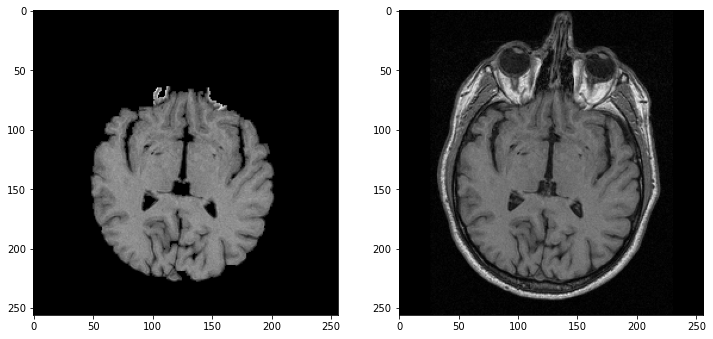

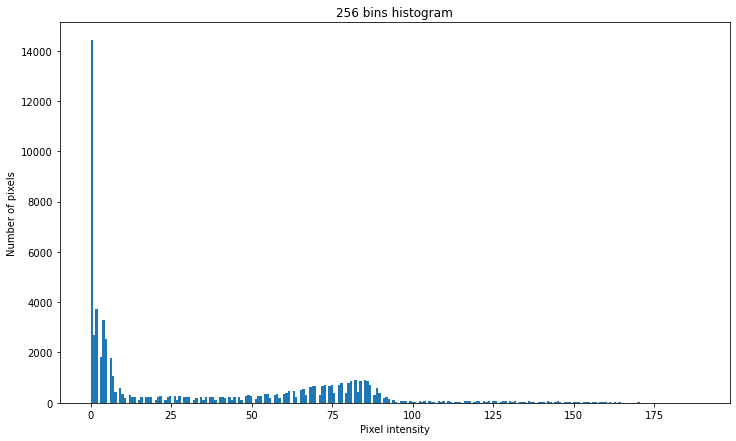

90
76


In [58]:
# Add your implementation and discussion
length=brain_im.shape[0]
sample=brain_im[130:150,140:160]
brain_copy=brain_im.copy()
#brain_copy=skimage.filters.gaussian(brain_copy,sigma=0.5)

#Homogeinity criterion based on two thresholds t_l<x<t_h
thresh=np.mean(sample)*0.6
thresh2=np.mean(sample)*1.1
mask=brain_im>thresh
#brain_copy[mask]=255

#Try
start=[210,125]
region=[start]
Exploring_map=np.zeros((length,length))
Exploring_map[start[0],start[1]]=2
process=True

while process :
    for pixel in region:
        X,Y = np.mgrid[pixel[0]-1:pixel[0]+2,pixel[1]-1:pixel[1]+2]#Find surrounding pixels
        Xsurr,Ysurr=np.vstack((X.ravel(), Y.ravel())) 
        Surr=np.vstack((Xsurr,Ysurr)).T #Making array with surrounding pixels coordinates
        for exp in Surr :
            if Exploring_map[exp[0],exp[1]] == 0: # If never explored
                if brain_copy[exp[0],exp[1]]>thresh and brain_copy[exp[0],exp[1]]<thresh2 : #If in range for brain
                    Exploring_map[exp[0],exp[1]] = 2
                else:
                    Exploring_map[exp[0],exp[1]] = 1 # If never explored and not in threshold
            elif Exploring_map[exp[0],exp[1]] ==2:# If already inquired, try once more for pixels around
                Exploring_map[exp[0],exp[1]]=3
            elif Exploring_map[exp[0],exp[1]] ==3:# If already inquired, exclude from next pixels to explore
                Exploring_map[exp[0],exp[1]]=4    
                
    region=np.vstack((np.where((Exploring_map==2)|(Exploring_map==3)))).transpose()
    #print(region)
    if region.shape[0]==0:
        process = False
    
mask=Exploring_map<1
print('region : \n',region.shape)
brain_copy[mask]=0 #See the whole brain region

# Display Images of the brain
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
ax[0].imshow(brain_copy, cmap='gray')
ax[1].imshow(brain_im, cmap='gray')
plt.show()

# Display histogram
nb_bins = 256
plt.figure(figsize=(12, 7))
plt.hist(brain_im.ravel(), bins=nb_bins)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('256 bins histogram')
plt.show()


print(brain_im[160,75])
print(brain_im[140,140])

In [ ]:
print(start_region,thresh,thresh2,'\n')
print(start_region_im,thresh,thresh2,'\n')
print(Exploring_map[152:158,72:82])

### 1.3 Contour detection (5pts)

In [ ]:
# Add your implementation and discussion

### 1.4 Additional method: Region Splitting (5pts)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


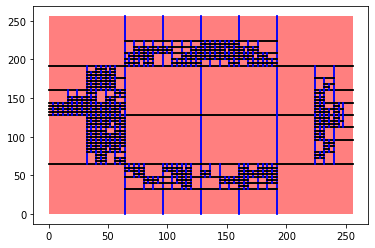

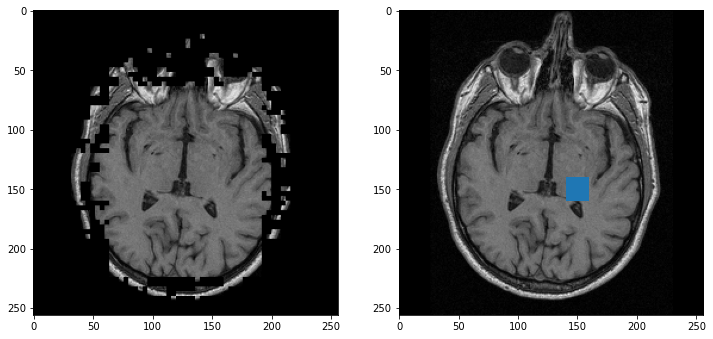

In [89]:
class Region: 
    def __init__(self, lower_left_x, lower_left_y, upper_right_x, upper_right_y):       
        self.lower_left_x= lower_left_x
        self.lower_left_y = lower_left_y
        self.upper_right_x=upper_right_x
        self.upper_right_y=upper_right_y 
        
    def vide(self):
        if self.lower_left_x==self.upper_right_x or self.lower_left_y==self.upper_right_y:
            return True
        
    def homog(self):
        mm=brain_im[self.lower_left_x:self.upper_right_x,
                  self.lower_left_y:self.upper_right_y]
        m=mm.mean()
        if m>thresh and m<thresh2:
            #print('m1:',m)
            return 1
        elif m<10: 
            #print('m2:',m)
            return 2
        else:
            return 3
        
    def size(self):
        xl=self.lower_left_x;
        yl=self.lower_left_y;
        xr=self.upper_right_x;
        yr=self.upper_right_y;
        return max([xr-xl,yr-yl])
    
    def split(self):
        xl=self.lower_left_x; yl=self.lower_left_y; xr=self.upper_right_x; yr=self.upper_right_y;
        if [xr-xl]>=[yr-yl]:
            return False
        else: 
            return True
        

length=brain_im.shape[0]
brain_copy=brain_im.copy()
sample=brain_im[75:175,100:200]
#Homogeinity criterion based on two thresholds t_l<x<t_h
thresh=np.mean(sample)*0.9
thresh2=np.mean(sample)*1.1
label_map=np.zeros(brain_im.shape)


list=[]
list.append(Region(0,0,brain_im.shape[0],brain_im.shape[1]))
rect=Rectangle((0,0),brain_im.shape[0],brain_im.shape[1],facecolor='r',edgecolor='None', alpha=0.5)

fig, ax = plt.subplots()
ax.add_patch(rect)
count=0
i=0
end=20

while len(list)>0 and count<=100: #while the list of regions is not empty 
    #list1=list.copy();
    #print('the length of the list is: ',len(list))
    i=0
    for region in list:      
        i+=1
        
        list.remove(region) #we remove the analysed region from the list
        if region.homog()==1: # if region satisfies homogeity condition 
            #print("1")
            label_map[region.lower_left_x:region.upper_right_x,
                      region.lower_left_y:region.upper_right_y]=1 # 1 is in Brain
        elif region.homog()==2 or region.size()<5: # if region is black or research region is small it is considered as no brain
            #print("2")
            label_map[region.lower_left_x:region.upper_right_x,
                      region.lower_left_y:region.upper_right_y]=0 #0 is out of brain
        else: # if the considered region its not defined, it gets split            
            #print("3")
            xl=region.lower_left_x;
            yl=region.lower_left_y;
            xr=region.upper_right_x;
            yr=region.upper_right_y;
            horizontal=region.split()
            if horizontal: #the split is either horizontal (50% of the time)
                #print("4")
                region1=Region(xl,yl,xr,round(yl+(yr-yl)/2))
                region2=Region(xl,round(yl+(yr-yl)/2),xr,yr)
                
                ax.plot([region2.lower_left_x ,region2.upper_right_x],
                        [region2.lower_left_y, region2.lower_left_y], color='black')
                ax.plot([region1.lower_left_x ,region1.upper_right_x],
                        [region1.upper_right_y, region1.upper_right_y], color='black')
                
            else: #the split can also be vertical 
                #print("5")     
                region1=Region(xl,yl,round(xl+(xr-xl)/2),yr) 
                region2=Region(round(xl+(xr-xl)/2),yl,xr,yr)
                
                ax.plot([region2.lower_left_x ,region2.lower_left_x],
                      [region2.lower_left_y, region2.upper_right_y],color='blue')
                ax.plot([region1.upper_right_x ,region1.upper_right_x],
                       [region1.lower_left_y, region1.upper_right_y],color='blue')
     
            list.append(region1) 
            list.append(region2)
    count+=1
plt.show()   


brain_dedieu=np.multiply(brain_im,label_map,)
# Display Images of the brain
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
ax[0].imshow(brain_dedieu, cmap='gray')
ax[1].imshow(brain_im, cmap='gray')
rect1=Rectangle((140,140),20,20)
ax[1].add_patch(rect1)
plt.show()

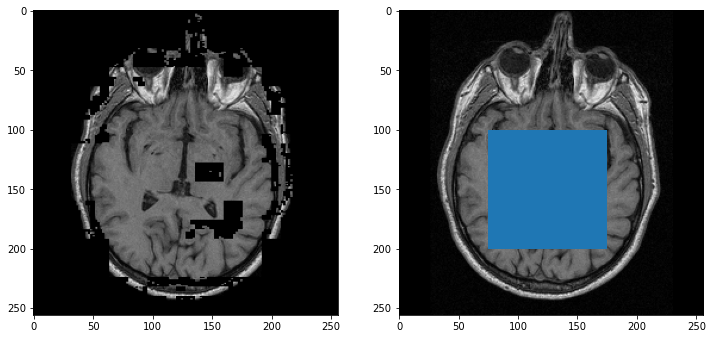

In [79]:
brain_dedieu=np.multiply(brain_im,label_map,)
# Display Images of the brain
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
ax[0].imshow(brain_dedieu, cmap='gray')
ax[1].imshow(brain_im, cmap='gray')
rect1=Rectangle((75,100),100,100)
ax[1].add_patch(rect1)
plt.show()

In [82]:
thresh

62.68032

In [29]:
class Region: 
    def __init__(self,label, upper_left_x, upper_left_y, lower_right_x, lower_right_y):       
        self.upper_left_x= upper_left_x
        self.upper_left_y = upper_left_y
        self.lower_right_x=lower_right_x
        self.lower_right_y=lower_right_y
        self.label=label    
    def amountPx(self):
        px=(self.upper_right_x-self.lower_right_x)*(self.upper_right_y-self.lower_right_y)
        return self.px    
    def checkP(self,inBrain,magic):
        px=(self.upper_left_x-self.lower_right_x)*(self.upper_left_y-self.lower_right_y)
        if inBrain>magic*px:
            return 1
        elif inBrain<(1-magic)*px:
            return 0        
list=[]

list.append(Region(0,0,0,brain_im.shape[0],brain_im.shape[1]))
round(list[0].lower_right_x/2,0)

128.0

In [ ]:
    #Getters
    def getUpperCornerRight():
        return self.upper_corner_right
    def getUpperCornerLeft():
        return self.upper_corner_left
    def getLowerCornerRight():
        return self.lower_corner_right
    def getLowerCornerLeft():
        return self.lower_corner_left
    def getLabel():
        return self.label
    
    #Setters 
  def setUpperCornerLeftX(value):
        self.upper_corner_left_x=value
    def setUpperCornerLeftY(value):
        self.upper_corner_left_y=value
    def setLowerCornerRightX(value):
        self.lower_corner_right_x=value
    def setLowerCornerRightY(value):
        self.lower_corner_right_y=value
    def setLabel(value):
        self.label=value

---
## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color (5pts).
2. Compute the total area (in pixels) of each color (5pts).

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

### 2.1 Visualization

In [ ]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

In [ ]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color (5 pts)

In [ ]:
# Add your implementation and discussion

### 2.3 Total area (in pixels) of each color (5 pts)

In [ ]:
# Add your implementation and discussion